# 3.7 Random Forests

## 1. Decision Trees

A **decision tree** is a supervised learning algorithm used for both classification and regression tasks. It is a flowchart-like structure where:
- **Internal nodes** represent tests on features (attributes),
- **Branches** represent the outcomes of these tests, and
- **Leaf nodes** represent the final output or decision (such as a class label or a predicted value).

Each node in the tree splits the data into subsets based on feature values that minimize a certain cost function, such as **Gini impurity** or **entropy** for classification, and **mean squared error** for regression.

---

**2. How Decision Trees Work**

1. **Splitting:** The algorithm begins at the root node by selecting a feature that best splits the dataset according to a chosen criterion. For classification, common metrics are **Gini impurity** or **information gain**.
   
2. **Recursive Partitioning:** This process is recursively applied to the resulting subsets, creating branches of the tree. Each decision aims to simplify the problem by reducing uncertainty about the outcome.

3. **Stopping Criteria:** The algorithm continues until it reaches a stopping condition, which could be a minimum node size or a maximum tree depth, to prevent overfitting.

4. **Prediction:** Once the tree is trained, it can classify new data points by traversing the tree from the root to a leaf, following the decisions at each node.

---
**3. Why Are Decision Trees Relevant in Geoscientific Research?**

Decision trees are particularly useful in geoscientific research for several reasons:

- **Interpretability:** Decision trees provide a clear, visual representation of how decisions are made. In geosciences, where models must often be explainable to a wide range of stakeholders (e.g., policymakers, environmentalists), decision trees allow users to understand and trust the predictions.

- **Handling Complex, Nonlinear Relationships:** Geoscientific data, such as environmental or climate data, often exhibit complex relationships between variables. Decision trees can naturally capture these nonlinear relationships without the need for heavy data preprocessing.

- **Handling Missing Data:** Decision trees can handle datasets with missing values, which is common in geoscience due to the challenges of continuous monitoring in harsh environments or remote locations.

- **Feature Importance:** Decision trees rank the importance of each feature based on its contribution to the model. This is valuable in geosciences to identify which factors (e.g., temperature, precipitation, or seismic activity) have the most impact on a particular outcome (e.g., predicting landslides or earthquakes).

- **Scalability:** Decision trees can be applied to large datasets, often found in geosciences, with minimal computational overhead. They can be adapted to distributed computing frameworks to handle vast geospatial datasets.

---
**4. Geoscientific Applications**

- **Seismic Event Classification:** Decision trees can classify seismic events (e.g., earthquakes, volcanic eruptions) based on waveforms, frequency content, and other features.
  
- **Landslide Risk Prediction:** They can model complex interactions between environmental variables like slope, soil type, and rainfall, identifying areas at higher risk of landslides.

- **Climate Classification and Prediction:** Decision trees can be used to classify climate zones based on environmental variables or predict future climate patterns by analyzing historical weather data.

---



## 2. Random Forest

## 2.1 Concepts

**1. What Are Random Forests?**

A **random forest** is an ensemble learning method that builds on the foundation of decision trees. Instead of relying on a single decision tree, random forests combine the predictions of **many decision trees** to improve accuracy, robustness, and reduce overfitting. Each tree in the forest independently makes a prediction, and the forest aggregates these predictions—typically by majority voting for classification tasks or averaging for regression tasks—to make a final decision.

----
**2. How Do Random Forests Work?**

1. **Bootstrap Aggregation (Bagging):** Each decision tree in a random forest is trained on a different subset of the original dataset. This is achieved through bootstrapping, where random samples (with replacement) are drawn from the dataset for each tree. This diversity in training data allows trees to develop slightly different models, reducing the likelihood that all trees make the same errors.

2. **Feature Randomness:** At each split, a random subset of features is chosen for consideration, rather than the full feature set. This randomness decorrelates the trees from each other, further reducing the chance of overfitting and enhancing generalization.

3. **Prediction Aggregation:** Once all trees in the forest have made their predictions, random forests aggregate these to produce a final output. For classification, it’s usually a majority vote across trees; for regression, the final output is the average prediction across trees.

---
**3. Why Random Forests Are Valuable in Geoscientific Research**

Random forests address some limitations of single decision trees, making them particularly powerful for geoscientific applications:

- **Increased Accuracy and Reduced Overfitting:** The ensemble approach of random forests typically improves prediction accuracy over a single decision tree. This is crucial in geosciences, where data can be noisy, and precise predictions are required for applications like hazard assessment.

- **Better Generalization:** Random forests generalize better than single trees due to the diversity in the ensemble. This means that random forests are more likely to perform well on new, unseen data, which is vital in dynamic geoscientific contexts (e.g., changing climate patterns or evolving geological conditions).

- **Feature Importance and Interpretability:** Like decision trees, random forests provide feature importance scores, indicating which features contribute most to predictions. This helps geoscientists identify key drivers of a phenomenon, such as factors leading to landslides or influencing seismic activity.

- **Scalability:** Random forests are highly scalable and can be distributed across multiple processors, making them suitable for large geospatial datasets commonly encountered in geoscience, such as remote sensing data.


## 2.2 Practice

In this tutorial, we will apply random forest regression model on a set of features to predict maximum temperature on a current day. Our example dataset is obtained from NOAA (https://www.noaa.gov/) and contained one year recording of daily temperatures at Seattle in 2016.

This Jupyter notebook is modified from Will Koehrsen's tutorial on Random Forests at [towardsdatascience](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0).

### First we will download the data

In [20]:
import wget
wget.download("https://docs.google.com/uc?export=download&id=1pko9oRmCllAxipZoa3aoztGZfPAD2iwj")


'temps (4).csv'

### Exploring the data

In [21]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('temps.csv')
features.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


* **Temp_2** : Maximum temperature on 2 days prior to today. 
* **Temp_1**: Maximum temperature on yesterday. 
* **Average**: Historical temperature average 
* **Actual**: Actual measure temperature on today. 
* **Forecast_NOAA**: Temperature values forecasted by NOAA
* **Friend**: Forecasted by Friend (Randomly selected number within plus-minus 20 of Average temperature)

In [22]:
print('The shape of our features is:', features.shape)

The shape of our features is: (348, 12)


In [23]:
# Descriptive statistics for each column
features.describe()


,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [24]:
# Use datetime for dealing with dates
import datetime

# Get years, months, and days
years = features['year']
months = features['month']
days = features['day']

# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

# Set the style
plt.style.use('fivethirtyeight')


## Quality Check

Identifying anomalous patterns by visually observing their plots

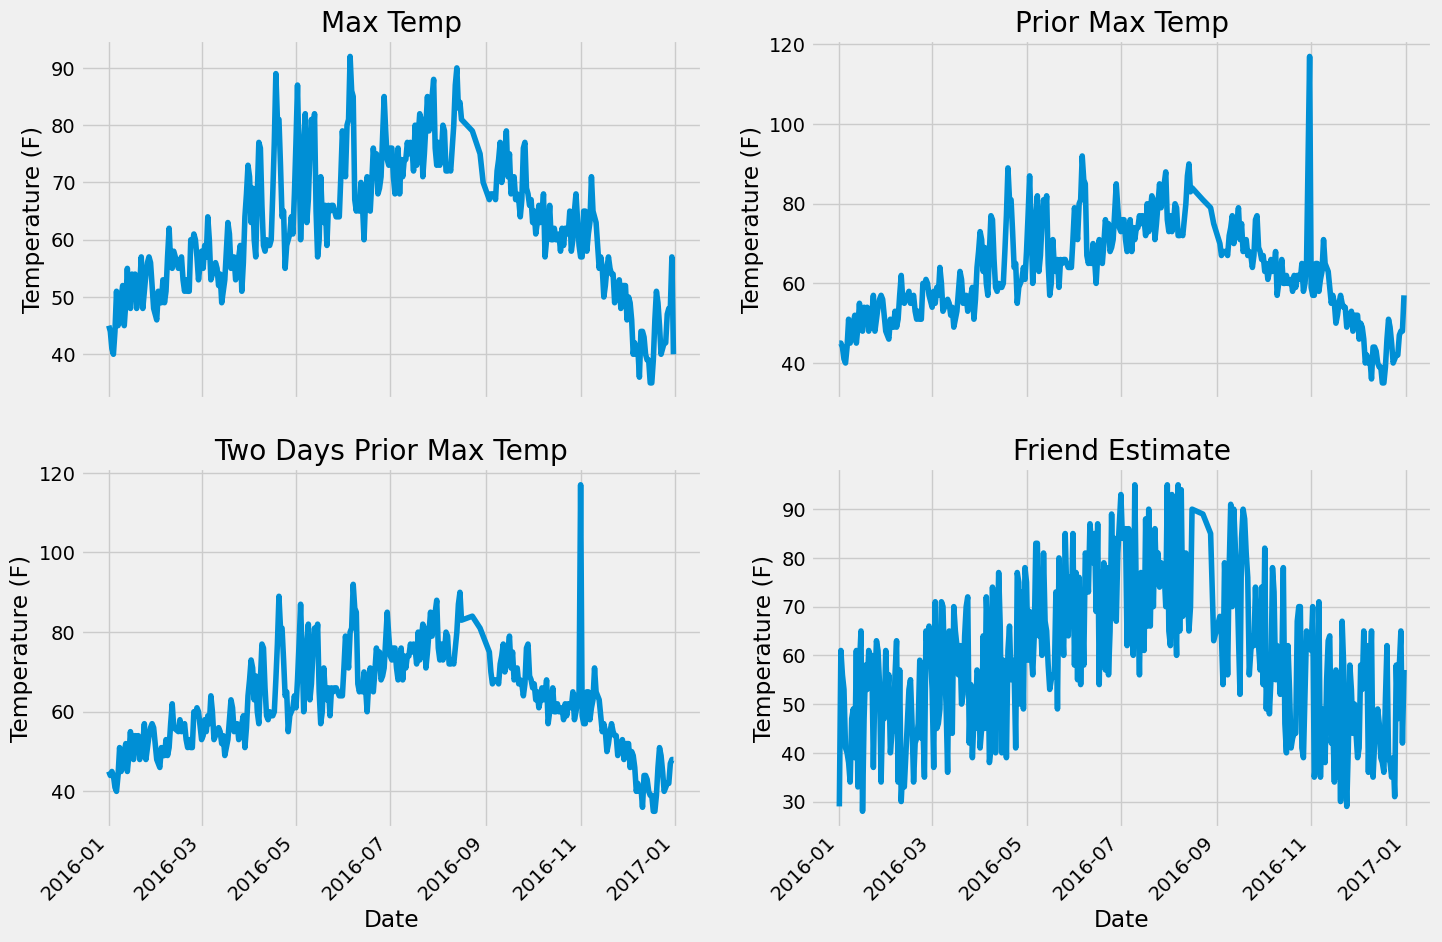

In [25]:
# Set up the plotting layout
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
fig.autofmt_xdate(rotation = 45)

# Actual max temperature measurement
ax1.plot(dates, features['actual'])
ax1.set_xlabel(''); ax1.set_ylabel('Temperature (F)'); ax1.set_title('Max Temp')

# Temperature from 1 day ago
ax2.plot(dates, features['temp_1'])
ax2.set_xlabel(''); ax2.set_ylabel('Temperature (F)'); ax2.set_title('Prior Max Temp')

# Temperature from 2 days ago
ax3.plot(dates, features['temp_2'])
ax3.set_xlabel('Date'); ax3.set_ylabel('Temperature (F)'); ax3.set_title('Two Days Prior Max Temp')

# Friend Estimate
ax4.plot(dates, features['friend'])
ax4.set_xlabel('Date'); ax4.set_ylabel('Temperature (F)'); ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)


## Data Preparation

##### 1. One-Hot Encoding



One-hot encoding is used to convert categorical values to numerical values. If the data was labeled from 1 to 7 for the days of the week, it would artificially assign greater importance to Sunday.

In [26]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,46.0,44,46,46,46,41,False,False,False,False,False,True,False


#### 2. Separating Features and Labels

labels in this case are the actual values of temperature

In [27]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['actual'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('actual', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

#### 3. Splitting the data randomly into Test and Training sets

random_state = 42 ensure the similarity of the split in each iteration

In [28]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [29]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


#### 4. Setting up the model baseline

In [30]:
# The baseline predictions are the historical averages
baseline_preds = test_features[:, feature_list.index('average')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  5.06


#### 5. Initializing a random forest regression model

In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

#### 6. Assessing the performance of a model 

In [32]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.87 degrees.


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.93 %.


#### 7. Computing the Feature Importances

In [15]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.66
Variable: average              Importance: 0.15
Variable: forecast_noaa        Importance: 0.05
Variable: forecast_acc         Importance: 0.03
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: forecast_under       Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


In [16]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.92 degrees.
Accuracy: 93.76 %.


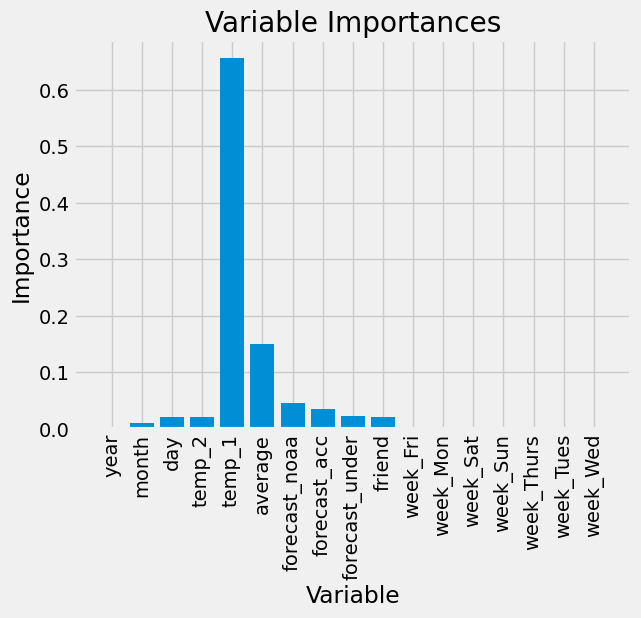

In [17]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

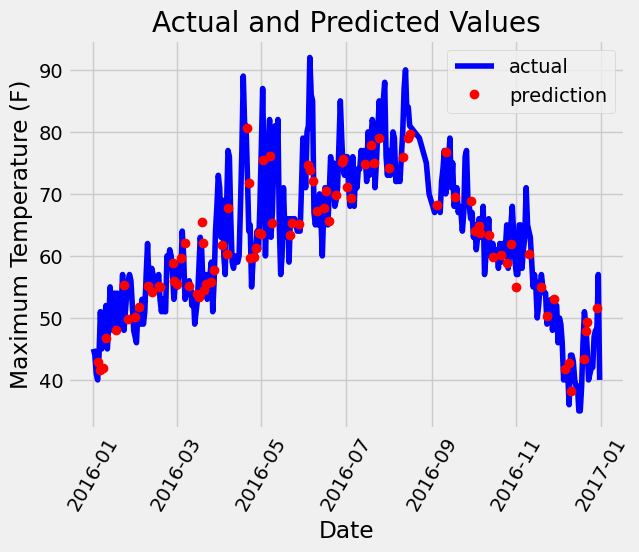

In [18]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('month')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = 60); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

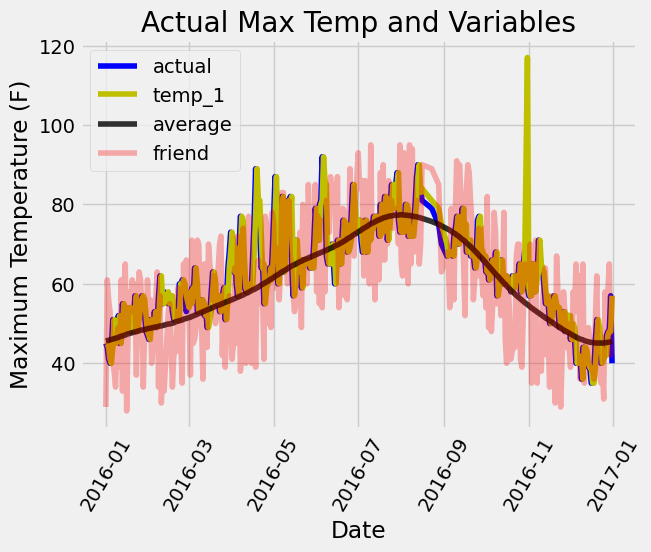

In [19]:
# Make the data accessible for plotting
true_data['temp_1'] = features[:, feature_list.index('temp_1')]
true_data['average'] = features[:, feature_list.index('average')]
true_data['friend'] = features[:, feature_list.index('friend')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = 60);
# Labels and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');